# 준비준비
```



In [ ]:
## 1번 실행 -> 런타임 다시 시작 -> 2번 실행 -> 3번 실행

## 1번

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (28.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

In [ ]:
## 2번

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

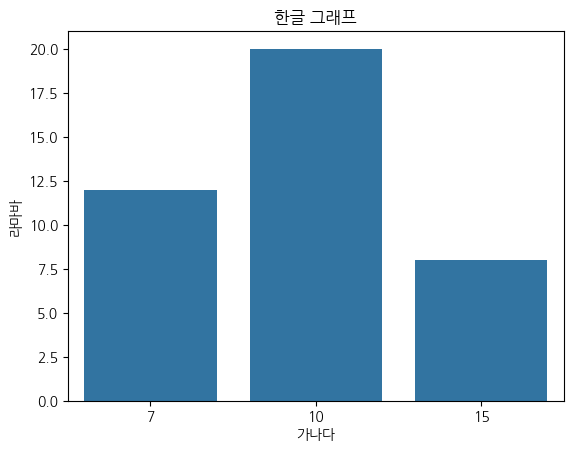

In [ ]:
## 3번

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔고딕 폰트 경로 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

# 그래프 그리기 예시
data = {'가나다': [10, 15, 7], '라마바': [20, 8, 12]}
df = pd.DataFrame(data)
sns.barplot(data=df, x='가나다', y='라마바')
plt.title('한글 그래프')
plt.show()


# 시작

In [ ]:
from google.colab import drive
drive.mount('/content/drvie')

Mounted at /content/drvie


In [ ]:
from google.colab import drive
drive.mount('/content/drvie')


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
# 1차 전처리 후 데이터 불러오기
df1 = pd.read_pickle('/content/drvie/MyDrive/대피/반도체_캐글/LSWMD/df_cleaned_withlabel_캐글 이미지 전처리_ver.02.pkl')

#/content/drvie/MyDrive/반도체_캐글/LSWMD/df_cleaned_withlabel_캐글 이미지 전처리_ver.02.pkl
df1.info()
df1.head()

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172950 entries, 0 to 172949
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               172950 non-null  int64  
 1   waferMap            172950 non-null  object 
 2   dieSize             172950 non-null  float64
 3   lotName             172950 non-null  object 
 4   trianTestLabel      172950 non-null  object 
 5   failureType         172950 non-null  object 
 6   failureNum          172950 non-null  int64  
 7   trainTestNum        172950 non-null  int64  
 8   waferMap_parameter  172950 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 11.9+ MB


,index,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum,waferMap_parameter
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)"
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)"
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)"
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)"
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)"


In [ ]:
# failureNum value 개수파악
failureNum_counts = df1['failureNum'].value_counts()

# failureNum 분류
failureNum_counts_sorted = failureNum_counts.sort_index()

# 결과
print(failureNum_counts_sorted)


failureNum
1      4294
2       555
3      5189
4      9680
5      3593
6       866
7      1193
8       149
9    147431
Name: count, dtype: int64


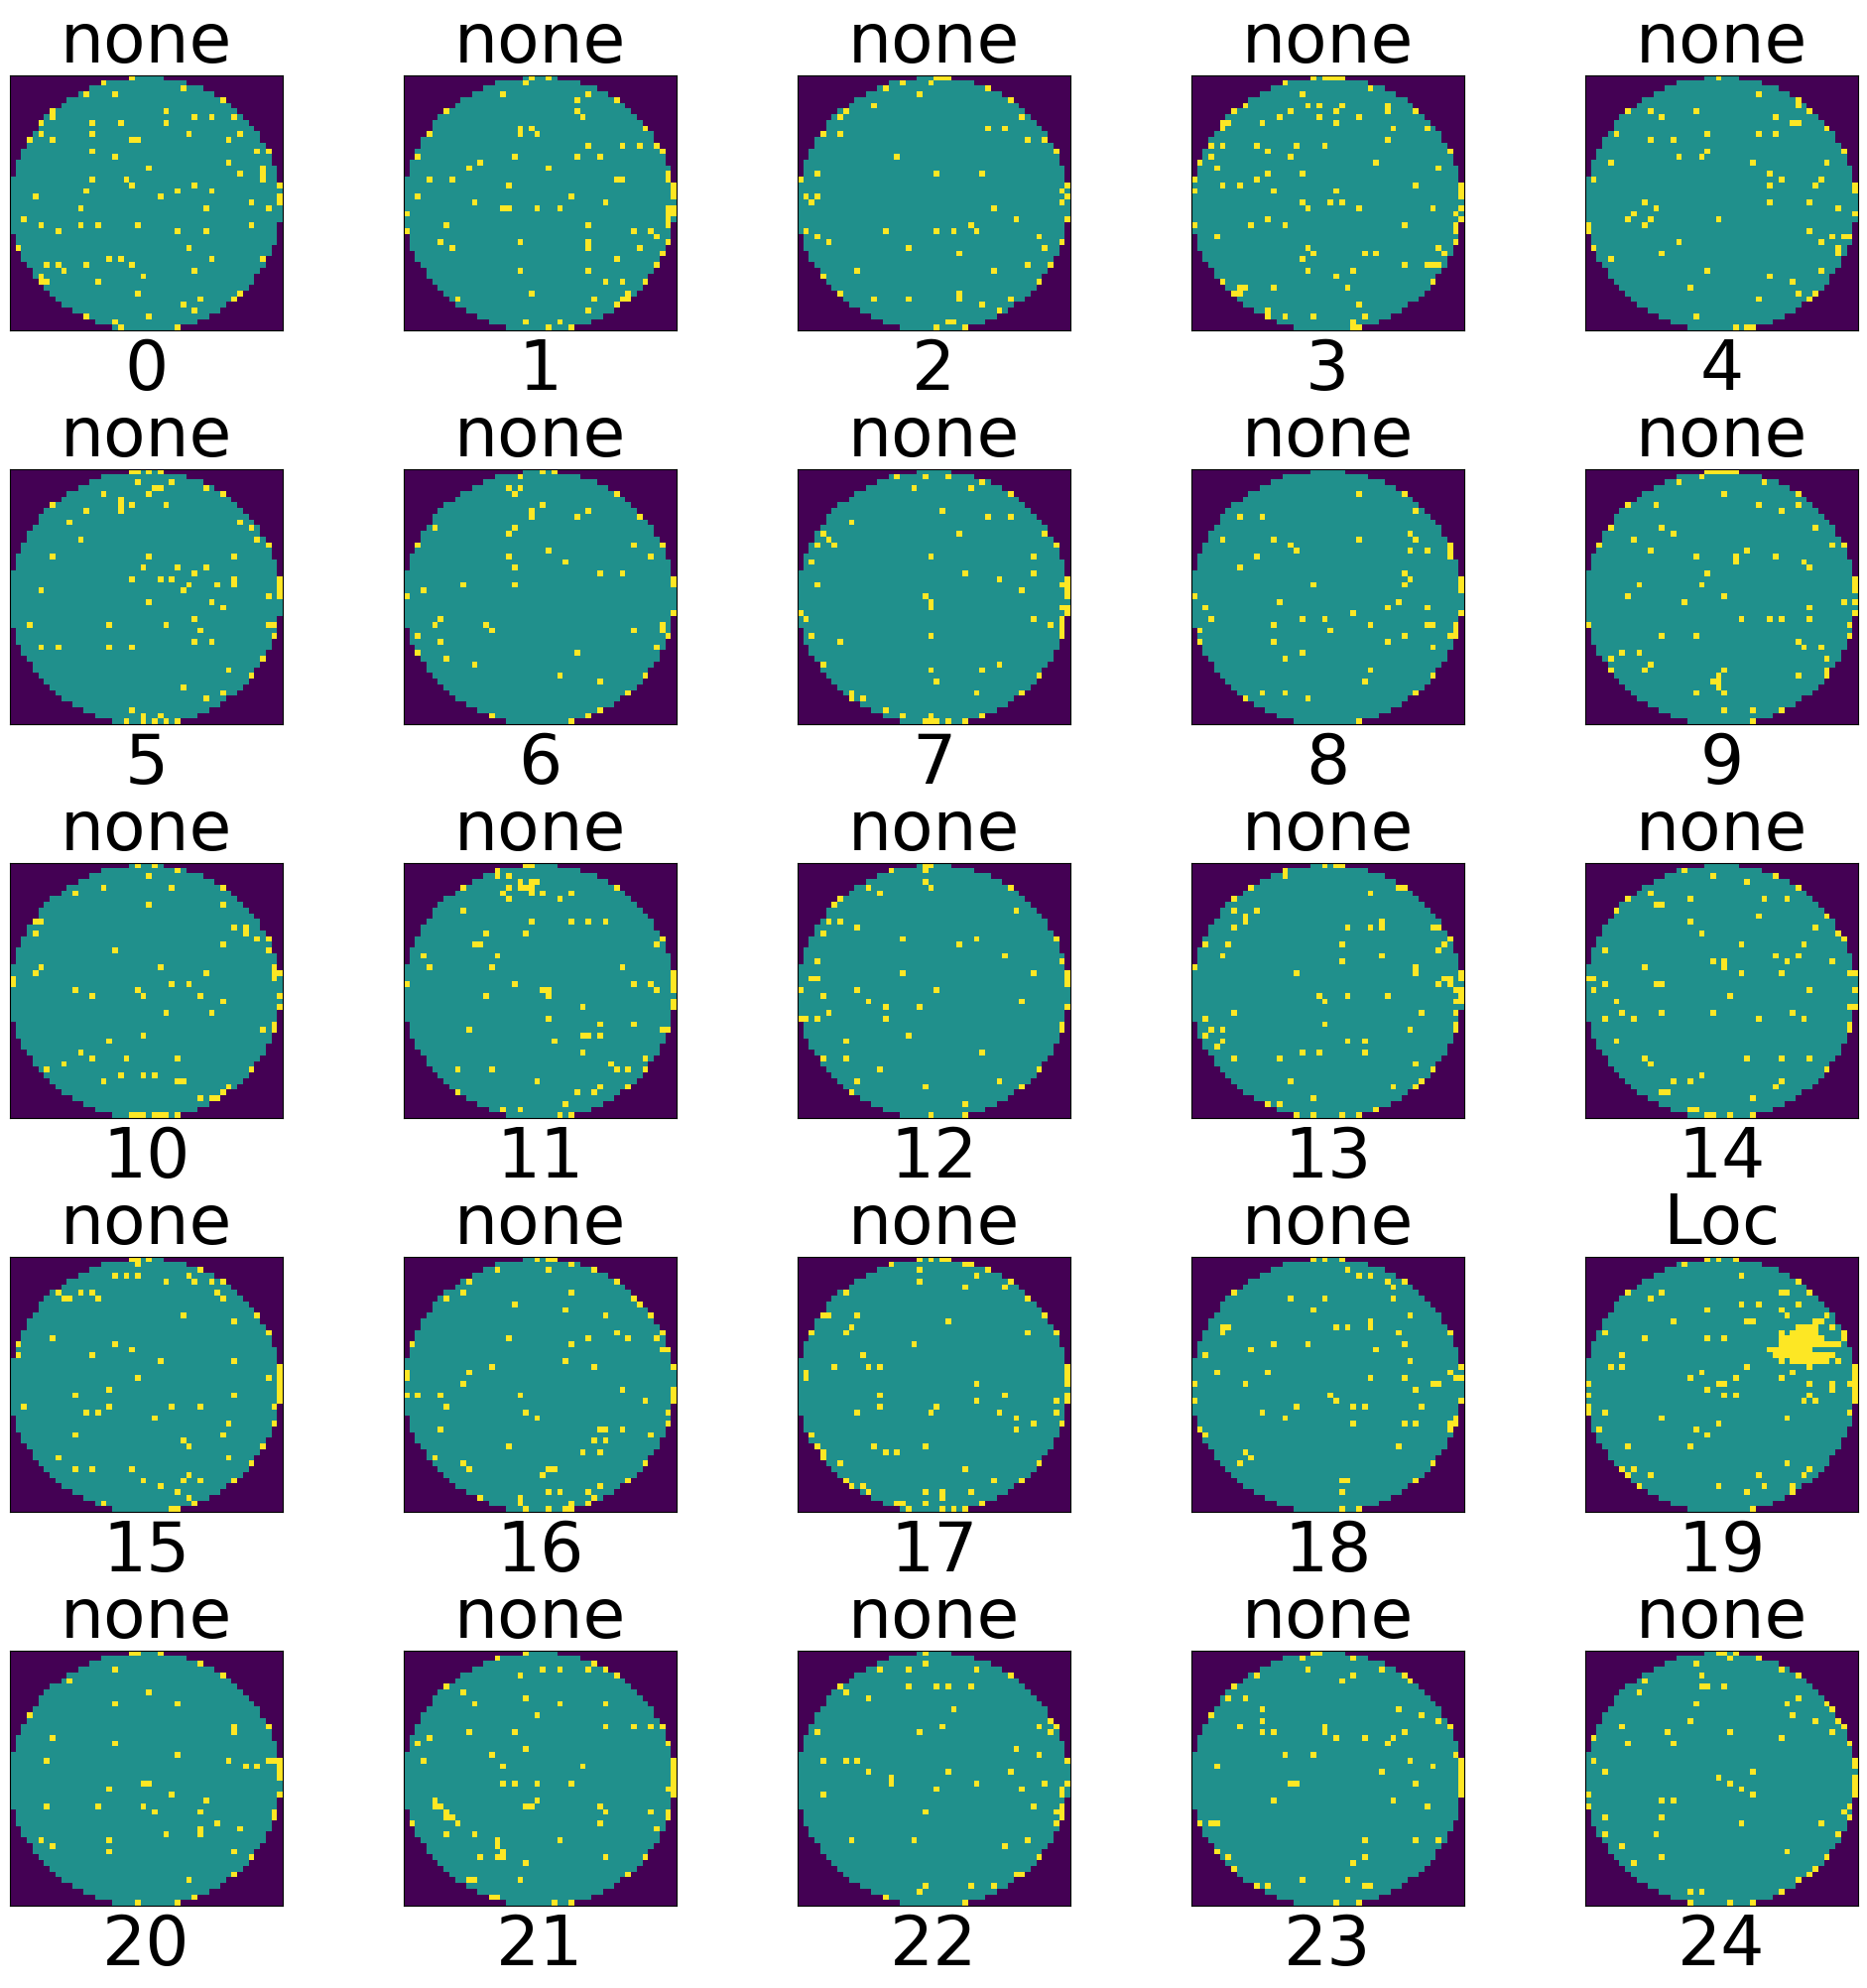

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize=(20, 20))
ax = ax.ravel(order='C')
for i in range(25):
    img = df1.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df1.failureType[i][0][0], fontsize=50)
    ax[i].set_xlabel(df1.index[i], fontsize=50)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# 먼저 데이터의 형태를 출력하여 확인합니다.
print(df1['failureType'].apply(type).unique())

# 데이터를 문자열로 변환합니다.
df1['failureType_str'] = df1['failureType'].apply(lambda x: str(x))

# 문자열로 변환된 열에서 고유값을 구합니다.
defect_types = df1['failureType_str'].unique()

print(defect_types)

[<class 'numpy.ndarray'>]
["[['none']]" "[['Loc']]" "[['Edge-Loc']]" "[['Center']]"
 "[['Edge-Ring']]" "[['Scratch']]" "[['Random']]" "[['Near-full']]"
 "[['Donut']]"]


In [ ]:
# 먼저 데이터의 형태를 출력하여 확인합니다.
print(df1['trianTestLabel'].apply(type).unique())

# 데이터를 문자열로 변환합니다.
df1['trianTestLabel_str'] = df1['trianTestLabel'].apply(lambda x: str(x))

# 문자열로 변환된 열에서 고유값을 구합니다.
trianTestLabel_types = df1['trianTestLabel_str'].unique()

print(trianTestLabel_types)

[<class 'numpy.ndarray'>]
["[['Training']]" "[['Test']]"]


In [ ]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172950 entries, 0 to 172949
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               172950 non-null  int64  
 1   waferMap            172950 non-null  object 
 2   dieSize             172950 non-null  float64
 3   lotName             172950 non-null  object 
 4   trianTestLabel      172950 non-null  object 
 5   failureType         172950 non-null  object 
 6   failureNum          172950 non-null  int64  
 7   trainTestNum        172950 non-null  int64  
 8   waferMap_parameter  172950 non-null  object 
 9   failureType_str     172950 non-null  object 
 10  trianTestLabel_str  172950 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 14.5+ MB


,index,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum,waferMap_parameter,failureType_str,trianTestLabel_str
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)",[['none']],[['Training']]
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)",[['none']],[['Training']]
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)",[['none']],[['Training']]
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)",[['none']],[['Training']]
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)",[['none']],[['Training']]


# 데이터 증강 2,6,8만

In [ ]:
from skimage.transform import rotate
import numpy as np
import pandas as pd

# 데이터 증강 함수
def augment_images(df, label, max_images):
    # 증강할 데이터를 저장할 임시 리스트
    augmented_images = []
    augmented_labels = []

    # 선택된 레이블의 데이터를 필터링하고 증강 횟수를 계산합니다.
    current_count = df[df['failureNum'] == label].shape[0]
    additional_count = max_images - current_count

    # 필요한 만큼만 데이터를 증강합니다.
    while additional_count > 0:
        # 증강할 이미지들을 무작위로 선택합니다.
        images_to_augment = df[df['failureNum'] == label]['waferMap'].sample(additional_count, replace=True)

        for image in images_to_augment:
            # 90도, 180도, 270도 회전 적용
            for angle in [90, 180, 270]:
                if additional_count <= 0:
                    break
                rotated_image = rotate(image, angle, preserve_range=True)
                augmented_images.append(rotated_image)
                augmented_labels.append(label)
                additional_count -= 1

            # 좌우 반전 적용
            if additional_count > 0:
                flipped_image = np.fliplr(image)
                augmented_images.append(flipped_image)
                augmented_labels.append(label)
                additional_count -= 1

    # 증강된 이미지와 레이블을 새로운 데이터프레임으로 만듭니다.
    augmented_df = pd.DataFrame({'waferMap': augmented_images, 'failureNum': augmented_labels})

    # 새로운 데이터프레임을 원본 데이터프레임과 병합합니다.
    df = pd.concat([df, augmented_df], ignore_index=True)

    return df

# 원본 데이터프레임을 로드합니다.
#df1 = pd.read_pickle('df1.pkl')

# 지정된 레이블에 대해 데이터 증강을 수행합니다.
for label in [2, 6, 8]:
    df1 = augment_images(df1, label, 1193)

# 증강된 데이터프레임을 저장하거나 사용합니다.
# df1.to_pickle('augmented_df1.pkl')


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174959 entries, 0 to 174958
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               172950 non-null  float64
 1   waferMap            174959 non-null  object 
 2   dieSize             172950 non-null  float64
 3   lotName             172950 non-null  object 
 4   trianTestLabel      172950 non-null  object 
 5   failureType         172950 non-null  object 
 6   failureNum          174959 non-null  int64  
 7   trainTestNum        172950 non-null  float64
 8   waferMap_parameter  172950 non-null  object 
 9   failureType_str     172950 non-null  object 
 10  trianTestLabel_str  172950 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 14.7+ MB


In [ ]:
# failureNum value 개수파악
failureNum_counts = df1['failureNum'].value_counts()

# failureNum 분류
failureNum_counts_sorted = failureNum_counts.sort_index()

# 결과
print(failureNum_counts_sorted)


failureNum
1      4294
2      1193
3      5189
4      9680
5      3593
6      1193
7      1193
8      1193
9    147431
Name: count, dtype: int64


In [ ]:
df1.tail()

,index,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum,waferMap_parameter,failureType_str,trianTestLabel_str
174954,NaN,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN
174955,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN
174956,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN
174957,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN
174958,NaN,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN


# 데이터 열 drop ->

In [ ]:
df2 = df1.drop(['dieSize', 'lotName', 'trianTestLabel', 'failureType', 'waferMap_parameter'], axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174959 entries, 0 to 174958
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               172950 non-null  float64
 1   waferMap            174959 non-null  object 
 2   failureNum          174959 non-null  int64  
 3   trainTestNum        172950 non-null  float64
 4   failureType_str     172950 non-null  object 
 5   trianTestLabel_str  172950 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 8.0+ MB


In [ ]:
df2.head()

,index,waferMap,failureNum,trainTestNum,failureType_str,trianTestLabel_str
0,0.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,1.0,[['none']],[['Training']]
1,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,1.0,[['none']],[['Training']]
2,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,1.0,[['none']],[['Training']]
3,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,1.0,[['none']],[['Training']]
4,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,1.0,[['none']],[['Training']]


In [ ]:
df2.tail()

,index,waferMap,failureNum,trainTestNum,failureType_str,trianTestLabel_str
174954,NaN,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",8,NaN,NaN,NaN
174955,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8,NaN,NaN,NaN
174956,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8,NaN,NaN,NaN
174957,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8,NaN,NaN,NaN
174958,NaN,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",8,NaN,NaN,NaN


In [ ]:
import pandas as pd

# df2 데이터프레임을 로드합니다.
# df2 = pd.read_pickle('path_to_df2.pkl') # 실제 경로를 지정해야 합니다.

# 'trainTestNum' 열에서 NaN 값을 1로 채웁니다.
df2['trainTestNum'] = df2['trainTestNum'].fillna(1)

# 'trainTestNum'이 1인 경우 'trianTestLabel_str'을 [['Training']]으로 설정합니다.
df2.loc[df2['trainTestNum'] == 1, 'trianTestLabel_str'] = '[["Training"]]'

# 결과 확인
print(df2.head())


   index                                           waferMap  failureNum  \
0    0.0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...           9   
1    1.0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...           9   
2    2.0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...           9   
3    3.0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...           9   
4    4.0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...           9   

   trainTestNum failureType_str trianTestLabel_str  
0           1.0      [['none']]     [["Training"]]  
1           1.0      [['none']]     [["Training"]]  
2           1.0      [['none']]     [["Training"]]  
3           1.0      [['none']]     [["Training"]]  
4           1.0      [['none']]     [["Training"]]  


In [ ]:
# 사전으로 불량 유형과 그에 해당하는 번호를 매핑
failure_type_mapping = {
    1: "[['Center']]",
    2: "[['Donut']]",
    3: "[['Edge-Loc']]",
    4: "[['Edge-Ring']]",
    5: "[['Loc']]",
    6: "[['Random']]",
    7: "[['Scratch']]",
    8: "[['Near-full']]",
    9: "[['none']]"
}

# 'failureNum' 열에 따라 'failureType_str' 열을 매핑된 값으로 채워넣음
df2['failureType_str'] = df2['failureNum'].map(failure_type_mapping)


In [ ]:
df2 = df2.drop(['index'], axis=1)

In [ ]:
# 각 열별 결측치 개수 확인
missing_values_count = df2.isnull().sum()
print(missing_values_count)


waferMap              0
failureNum            0
trainTestNum          0
failureType_str       0
trianTestLabel_str    0
dtype: int64


In [ ]:
value_counts = df2['trainTestNum'].value_counts()

# 결과를 출력합니다.
print(value_counts)

trainTestNum
2.0    118595
1.0     56364
Name: count, dtype: int64


In [ ]:
df2.tail()

,waferMap,failureNum,trainTestNum,failureType_str,trianTestLabel_str
174954,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",8,1.0,[['Near-full']],"[[""Training""]]"
174955,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8,1.0,[['Near-full']],"[[""Training""]]"
174956,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8,1.0,[['Near-full']],"[[""Training""]]"
174957,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8,1.0,[['Near-full']],"[[""Training""]]"
174958,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",8,1.0,[['Near-full']],"[[""Training""]]"


In [ ]:
## none 데이터 개수 확인

import pandas as pd

# 'failureType_str'이 'none'인 행만 필터링합니다
none_failure_df = df2[df2['failureType_str'].apply(lambda x: 'none' in x)]

# 'trainTestLabel_str'에 따라 그룹화하고 각 그룹의 크기를 계산합니다
label_counts = none_failure_df['trianTestLabel_str'].value_counts()

# 결과 출력
print(label_counts)


trianTestLabel_str
[['Test']]        110701
[["Training"]]     36730
Name: count, dtype: int64


# 마스킹

파일 다운로드 -> 일단 이미지는 램이 터짐

In [ ]:
import numpy as np
import pandas as pd

# 가정: df2는 이미 로드된 pandas DataFrame입니다.
# 여기서는 예시 데이터를 생성해서 사용합니다.
# df2 = pd.read_pickle('your_data.pkl') # 실제 코드에서는 이 줄을 사용합니다.

# 마스킹 함수 정의
def mask_defects(waferMap):
    # 불량 부분(값이 2인 부분)은 1로, 나머지는 0으로 설정
    return np.where(waferMap == 2, 1, 0)

# 마스킹 작업 수행
# df2에 'masked_waferMap'이라는 새로운 열을 추가하여 마스킹된 이미지 저장
df2['masked_waferMap'] = df2['waferMap'].apply(mask_defects)

df2[['waferMap', 'masked_waferMap']].head()  # 결과 확인



,waferMap,masked_waferMap
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


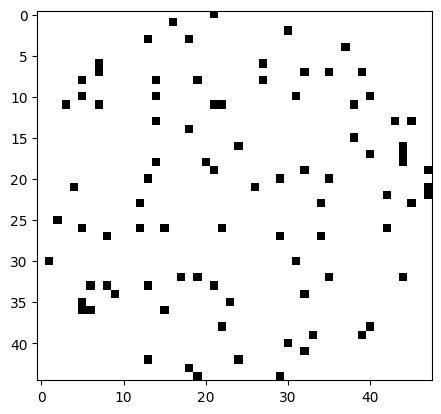

In [ ]:
def color_masked_image(masked_array):
    # 하얀색 배경 (값이 0인 부분을 하얀색으로 설정)
    colored_image = np.ones((*masked_array.shape, 3), dtype=np.uint8) * 255
    # 불량 부분 (값이 1인 부분을 검은색으로 설정)
    colored_image[masked_array == 1] = [0, 0, 0]
    return colored_image

# 마스킹된 이미지를 검은색과 하얀색으로 변환
df2['colored_waferMap'] = df2['masked_waferMap'].apply(color_masked_image)

# 결과 확인을 위한 코드 - 실제 사용시에는 이미지 확인을 위한 추가적인 코드가 필요할 수 있음
# 예를 들어, matplotlib 라이브러리를 사용하여 이미지를 표시할 수 있음
import matplotlib.pyplot as plt

# 첫 번째 이미지를 시각화하는 예
plt.imshow(df2['colored_waferMap'].iloc[0])
plt.show()


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174959 entries, 0 to 174958
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   waferMap            174959 non-null  object 
 1   failureNum          174959 non-null  int64  
 2   trainTestNum        174959 non-null  float64
 3   failureType_str     174959 non-null  object 
 4   trianTestLabel_str  174959 non-null  object 
 5   masked_waferMap     174959 non-null  object 
 6   colored_waferMap    174959 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.3+ MB


In [ ]:
#df2 = df2.drop(['waferMap'], axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174959 entries, 0 to 174958
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   waferMap            174959 non-null  object 
 1   failureNum          174959 non-null  int64  
 2   trainTestNum        174959 non-null  float64
 3   failureType_str     174959 non-null  object 
 4   trianTestLabel_str  174959 non-null  object 
 5   masked_waferMap     174959 non-null  object 
 6   colored_waferMap    174959 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.3+ MB


In [ ]:
del df
del df1

NameError: name 'df' is not defined

In [ ]:
df2.head()

,waferMap,failureNum,trainTestNum,failureType_str,trianTestLabel_str,masked_waferMap,colored_waferMap
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,1.0,[['none']],"[[""Training""]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,1.0,[['none']],"[[""Training""]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,1.0,[['none']],"[[""Training""]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,1.0,[['none']],"[[""Training""]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,1.0,[['none']],"[[""Training""]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."


Training과 Test 파일 따로 저장

In [ ]:
# 'trianTestLabel_str'이 'Training'인 행만 필터링합니다
none_failure_df_Tr = df2[df2['trianTestLabel_str'].apply(lambda x: 'Training' in x)]


# 'trianTestLabel_str'이 'Test'인 행만 필터링합니다
none_failure_df_Te = df2[df2['trianTestLabel_str'].apply(lambda x: 'Test' in x)]

In [ ]:
# 'Train의 failureType_str에 따라 그룹화하고 각 그룹의 크기를 계산합니다
label_counts = none_failure_df_Tr['failureType_str'].value_counts()

# 결과 출력
print(label_counts)


failureType_str
[['none']]         36730
[['Edge-Ring']]     8554
[['Center']]        3462
[['Edge-Loc']]      2417
[['Loc']]           1620
[['Near-full']]     1098
[['Donut']]         1047
[['Random']]         936
[['Scratch']]        500
Name: count, dtype: int64


In [ ]:
# 'Train의 failureType_str에 따라 그룹화하고 각 그룹의 크기를 계산합니다
label_counts = none_failure_df_Te['failureType_str'].value_counts()

# 결과 출력
print(label_counts)

failureType_str
[['none']]         110701
[['Edge-Loc']]       2772
[['Loc']]            1973
[['Edge-Ring']]      1126
[['Center']]          832
[['Scratch']]         693
[['Random']]          257
[['Donut']]           146
[['Near-full']]        95
Name: count, dtype: int64


In [ ]:
# none_failure_df_Tr에서 'none' 타입 행을 추출 후 3000개로 제한
df_tr_none = none_failure_df_Tr[none_failure_df_Tr['failureType_str'] == "[['none']]"]
df_tr_none_limited = df_tr_none.sample(n=3000, random_state=42)  # 무작위로 3000개 샘플링

# none_failure_df_Te에서 'none' 타입 행을 추출 후 3000개로 제한
df_te_none = none_failure_df_Te[none_failure_df_Te['failureType_str'] == "[['none']]"]
df_te_none_limited = df_te_none.sample(n=3000, random_state=42)  # 무작위로 3000개 샘플링

# 나머지 데이터 추출
df_tr_rest = none_failure_df_Tr[none_failure_df_Tr['failureType_str'] != "[['none']]"]
df_te_rest = none_failure_df_Te[none_failure_df_Te['failureType_str'] != "[['none']]"]

# 제한된 'none' 데이터와 나머지 데이터를 병합
df_tr_final = pd.concat([df_tr_none_limited, df_tr_rest])
df_te_final = pd.concat([df_te_none_limited, df_te_rest])

# 인덱스 재설정
df_tr_final.reset_index(drop=True, inplace=True)
df_te_final.reset_index(drop=True, inplace=True)

# 결과 확인
print(df_tr_final['failureType_str'].value_counts())
print(df_te_final['failureType_str'].value_counts())


failureType_str
[['Edge-Ring']]    8554
[['Center']]       3462
[['none']]         3000
[['Edge-Loc']]     2417
[['Loc']]          1620
[['Near-full']]    1098
[['Donut']]        1047
[['Random']]        936
[['Scratch']]       500
Name: count, dtype: int64
failureType_str
[['none']]         3000
[['Edge-Loc']]     2772
[['Loc']]          1973
[['Edge-Ring']]    1126
[['Center']]        832
[['Scratch']]       693
[['Random']]        257
[['Donut']]         146
[['Near-full']]      95
Name: count, dtype: int64


In [ ]:
df_tr_final.head()

,waferMap,failureNum,trainTestNum,failureType_str,trianTestLabel_str,masked_waferMap,colored_waferMap
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",9,1.0,[['none']],"[[""Training""]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",9,1.0,[['none']],"[[""Training""]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1,...",9,1.0,[['none']],"[[""Training""]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",9,1.0,[['none']],"[[""Training""]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",9,1.0,[['none']],"[[""Training""]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [ ]:
# none_failure_df_Tr 데이터프레임을 pickle 파일로 저장
df_tr_final.to_pickle("/content/drvie/MyDrive/대피/반도체_캐글/LSWMD/failure_df_Tr_1.pkl")

# none_failure_df_Te 데이터프레임을 pickle 파일로 저장
df_te_final.to_pickle("/content/drvie/MyDrive/대피/반도체_캐글/LSWMD/failure_df_Te_1.pkl")


In [ ]:
df2_tr_final = df_tr_final.drop(['waferMap', 'masked_waferMap'], axis=1)
df2_te_final = df_te_final.drop(['waferMap', 'masked_waferMap'], axis=1)





In [ ]:
df2_tr_final.head()

,failureNum,trainTestNum,failureType_str,trianTestLabel_str,colored_waferMap
0,9,1.0,[['none']],"[[""Training""]]","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,9,1.0,[['none']],"[[""Training""]]","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,9,1.0,[['none']],"[[""Training""]]","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,9,1.0,[['none']],"[[""Training""]]","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,9,1.0,[['none']],"[[""Training""]]","[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [ ]:
# none_failure_df_Tr 데이터프레임을 pickle 파일로 저장
df2_tr_final.to_pickle("/content/drvie/MyDrive/대피/반도체_캐글/LSWMD/failure_df_Tr_2.pkl")

# none_failure_df_Te 데이터프레임을 pickle 파일로 저장
df2_te_final.to_pickle("/content/drvie/MyDrive/대피/반도체_캐글/LSWMD/failure_df_Te_2.pkl")


# 이미지 저장

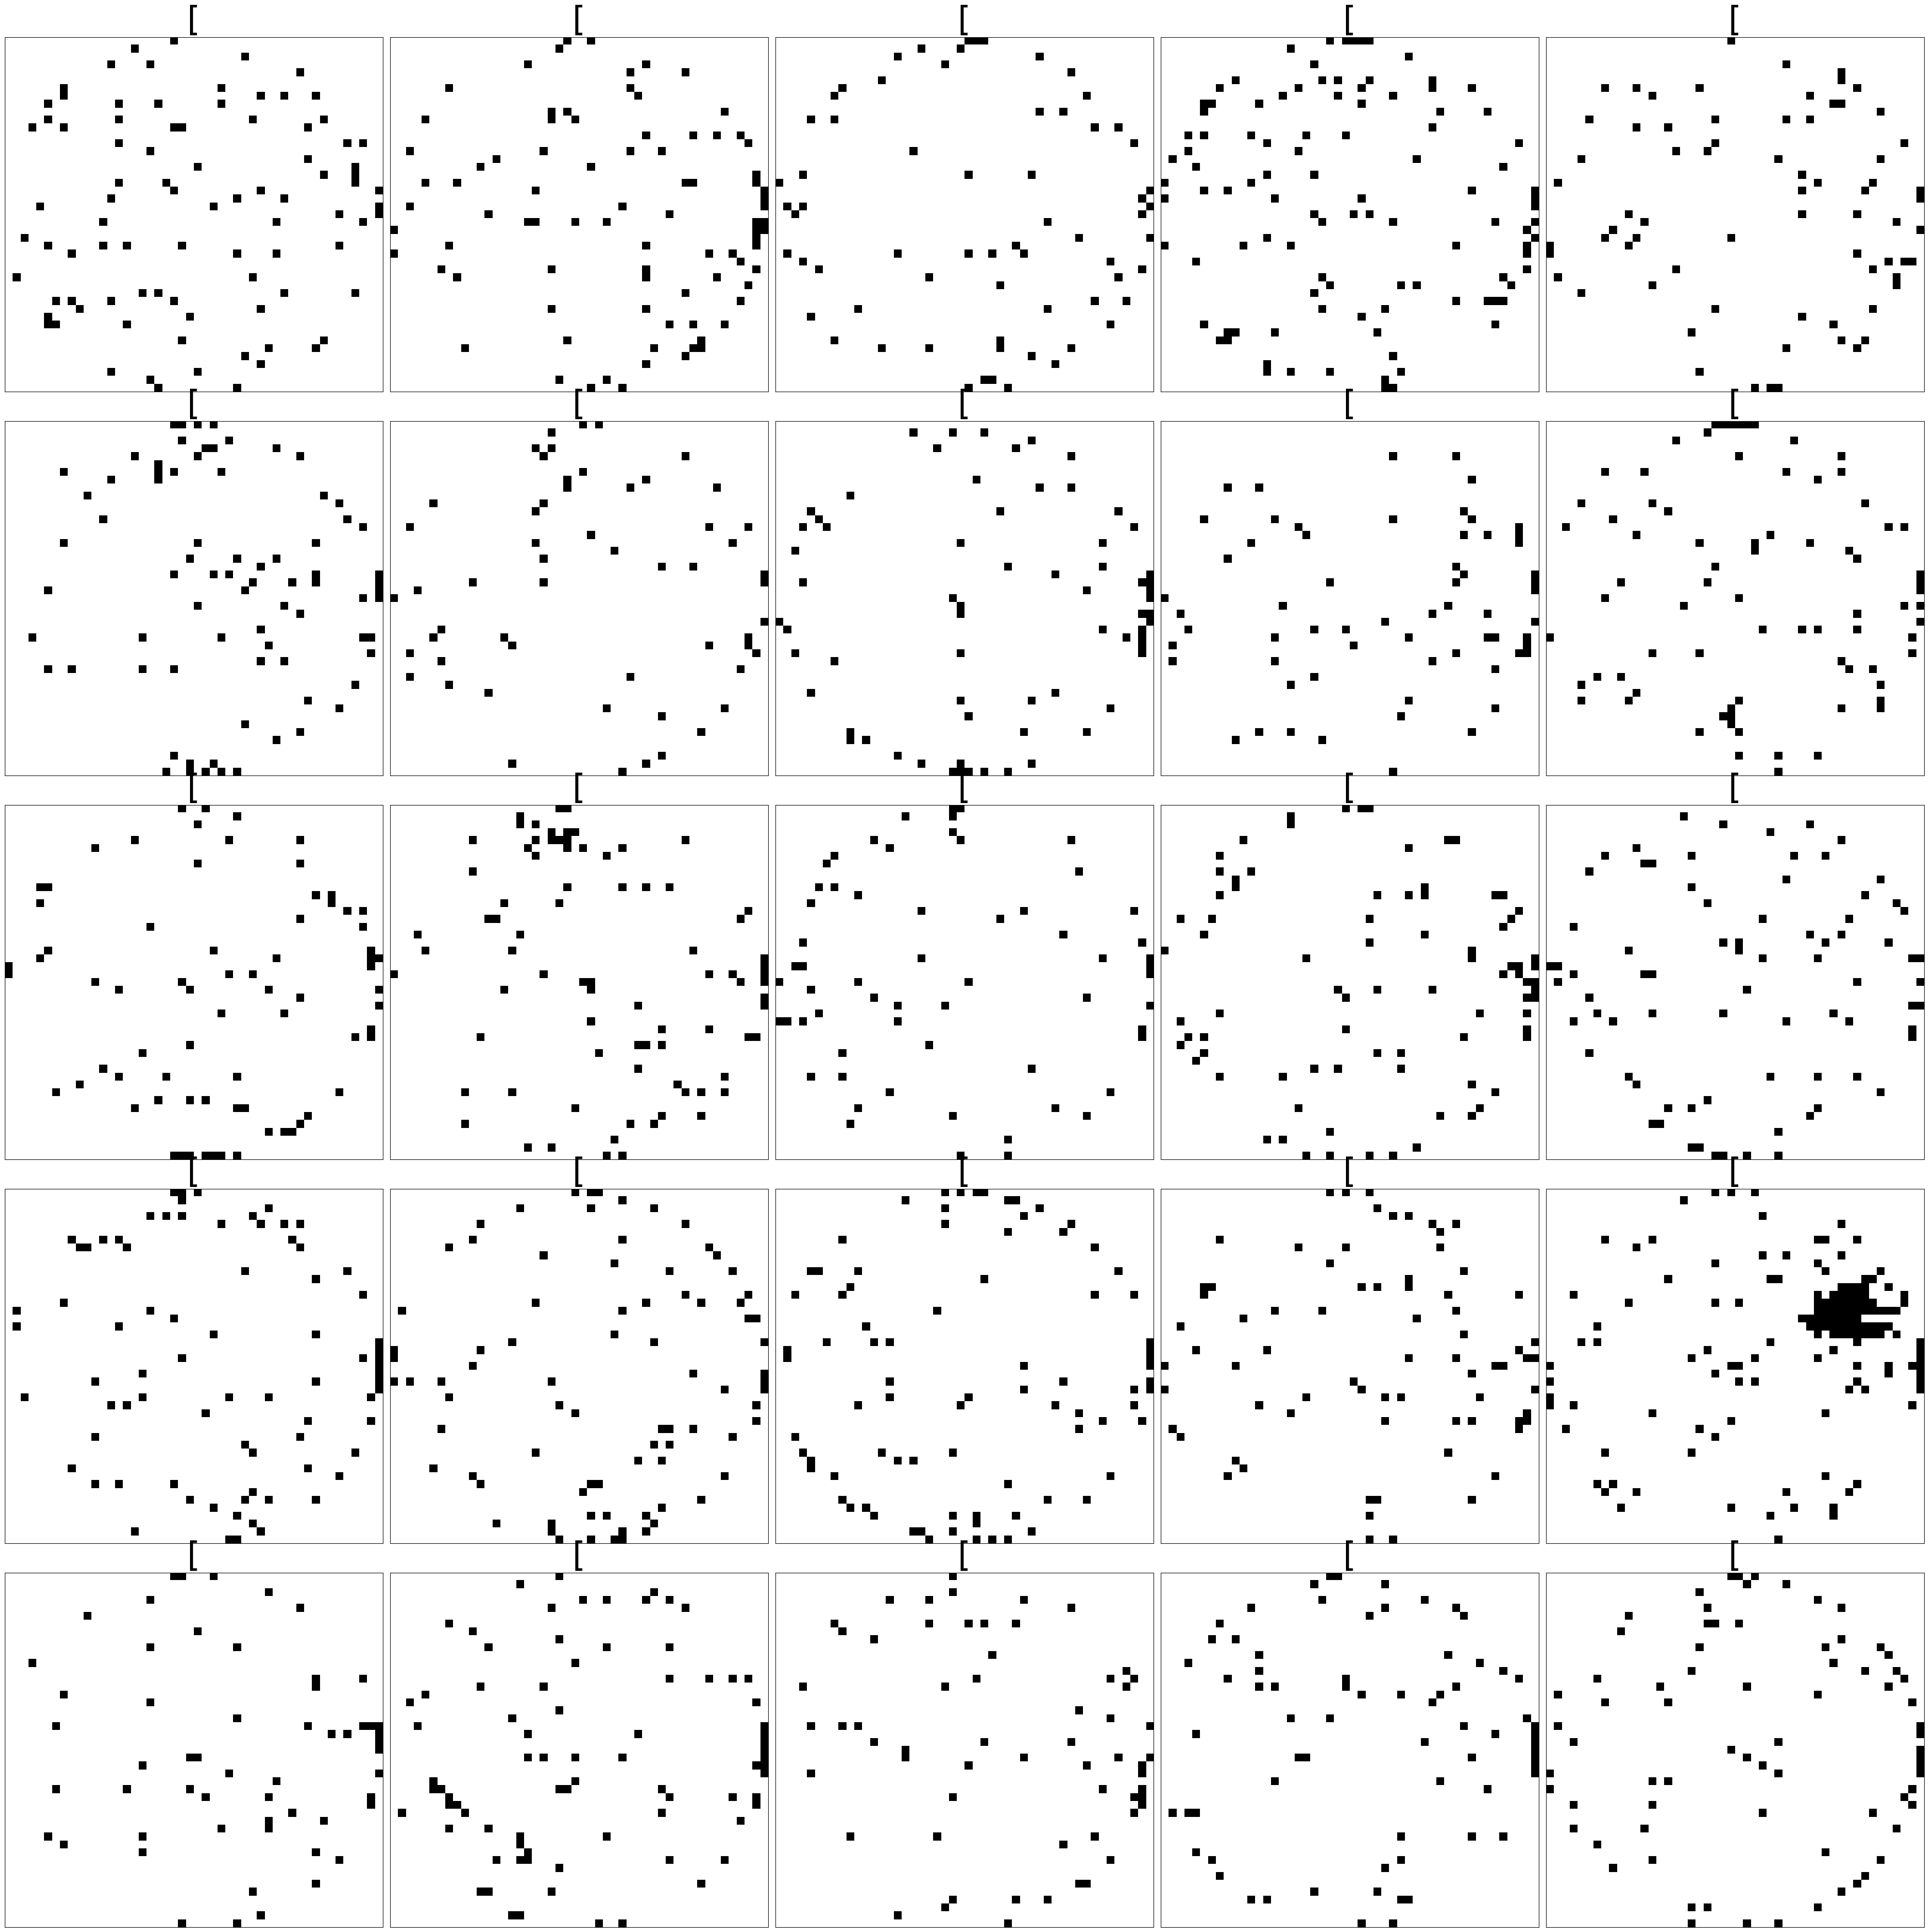

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize=(40, 40))
ax = ax.ravel(order='C')
for i in range(25):
    img = df2.colored_waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df2.failureType_str[i][0][0], fontsize=50)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# 각 열별 결측치 개수 확인
missing_values_count = df2_te_final.isnull().sum()
print(missing_values_count)


failureNum            0
trainTestNum          0
failureType_str       0
trianTestLabel_str    0
colored_waferMap      0
dtype: int64


In [ ]:
# 각 열별 결측치 개수 확인
missing_values_count = df2_tr_final.isnull().sum()
print(missing_values_count)

failureNum            0
trainTestNum          0
failureType_str       0
trianTestLabel_str    0
colored_waferMap      0
dtype: int64


In [ ]:
import os
from PIL import Image

# 이미지를 저장할 기본 폴더 설정
base_folder = '/content/drvie/MyDrive/waferimage_folder'


def save_images(dataframe, base_folder_name):
    for index, row in dataframe.iterrows():
        # 이미지 데이터를 가져옴
        image_data = row['colored_waferMap']
        # 레이블에 따라 서브 폴더 설정
        label_folder = row['failureType_str'][2:-2]  # "[['none']]" -> "none"
        # 서브 폴더 경로
        sub_folder_path = os.path.join(base_folder, base_folder_name, label_folder)
        # 서브 폴더 생성
        os.makedirs(sub_folder_path, exist_ok=True)
        # 이미지 저장 경로 설정
        image_path = os.path.join(sub_folder_path, f'image_{index}.png')
        # 이미지를 224x224 크기로 조정하고 저장
        Image.fromarray(image_data.astype('uint8'), 'RGB').resize((224, 224)).save(image_path)

# 'Training' 데이터 저장
save_images(df2_tr_final, 'Training')

# 'Test' 데이터 저장
save_images(df2_te_final, 'Test')


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# pickle 파일을 로드합니다.
df = pd.read_pickle('none_failure_df_Tr.pickle')

# 'failureType_str' 열의 고유 값들에 대해 폴더를 생성합니다.
for failure_type in df['failureType_str'].unique():
    os.makedirs(f'images/{failure_type}', exist_ok=True)  # images 폴더 안에 각 failure_type 이름으로 폴더 생성

# 각 행에 대해 이미지를 생성하고, 해당하는 폴더에 저장합니다.
for index, row in df.iterrows():
    # 데이터를 시각화합니다. 예를 들어 행의 데이터를 바 차트로 만들 수 있습니다.
    plt.figure()
    row_data = row.drop('failureType_str')  # 이미지에는 failureType_str를 제외한 데이터만 표시
    plt.bar(row_data.index, row_data.values)
    plt.title(f'Index: {index}, Failure Type: {row["failureType_str"]}')

    # 이미지를 저장합니다. 이미지의 이름을 index로 하여 저장할 수 있습니다.
    plt.savefig(f'images/{row["failureType_str"]}/{index}.png')
    plt.close()
